# Introduction 

## What is Complete Case Analysis? 
* Complete Case Analysis = CCA = list-wise deletion
* Removing observations that have any of variables mising and analyzing only complete observations


## Assumptions
* Data is missing at random  

## Advantage 
* Simple 
* No data manipulation 
* Preserves the distribution of the variables  


## Disadvantage 
* Missing data can be a large fraction of the original dataset
* Data is not missing at random 
* Excluded observations could be informative for analysis 
* Complete dataset could be biased after exclusion 
* When the model is in production, it won't know how to handle missing data

## When to use 
* Data is missing at random 
* No more than 5% of the total dataset contains missing data 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/house_price/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

## Find observations with missing variables 

In [5]:
# fraction of data that are missing 
df.isnull().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [6]:
# column nams that have any missing value
var_w_na = [var for var in df.columns if df[var].isnull().mean()>0]

In [7]:
var_w_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
# check data 
df[var_w_na].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [9]:
# fraction of data that are missing for variables that have any missing values 
df[var_w_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Noe that there are variables like `PoolQC`, `MiscFeature`, or `Alley` whose values are mostly missing (over 90%). If we remove all the observations that have missing valus in any variable, we will have to remove 99.5% of data. Therefore, we will ignore the variables with high missing data ratio and focus on the variables that have less than 5% of missing data.

## Determine variables to perform CCA

In [10]:
# column nams that have any missing value
vars_cca = [var for var in df.columns if df[var].isnull().mean()<0.05]

In [11]:
vars_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [12]:
df[vars_cca].head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Drop NA observations

In [13]:
df_cca = df[vars_cca].dropna()

In [14]:
print(f"original data shape: {df.shape}")
print(f"shape after cca: {df_cca.shape}")

original data shape: (1460, 81)
shape after cca: (1412, 70)


In [15]:
print(f"percentage of complete data: {len(df[vars_cca].dropna())/len(df[vars_cca])*100: .2f}%")

percentage of complete data:  96.71%


## Compare data before vs. after CCA: Continuous variables

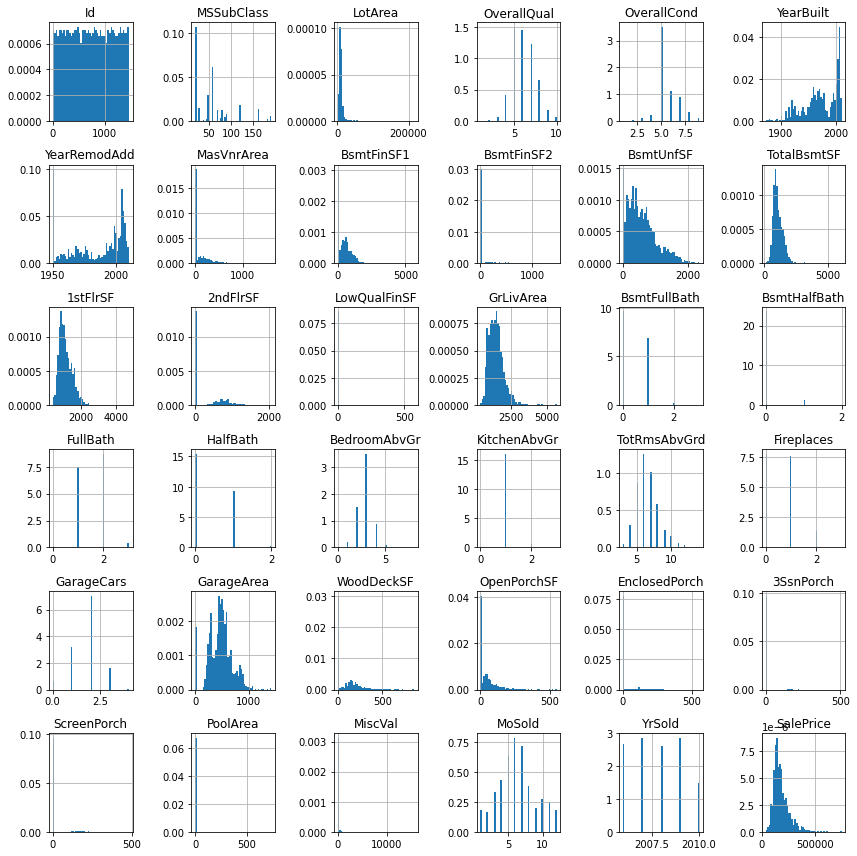

In [16]:
# numerical data in the complete case dataset  
df_cca.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

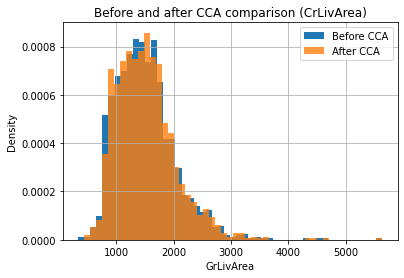

In [17]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['GrLivArea'].hist(bins=50, density=True)
df_cca['GrLivArea'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('GrLivArea')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (CrLivArea)')
ax.legend(['Before CCA', 'After CCA'])
plt.show()

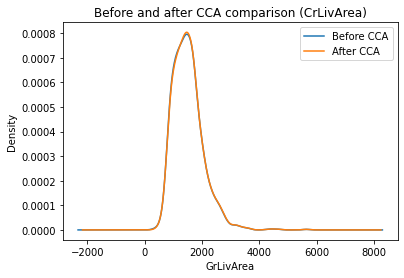

In [18]:
# check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['GrLivArea'].plot.density()
df_cca['GrLivArea'].plot.density()

ax.set_xlabel('GrLivArea')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (CrLivArea)')
ax.legend(['Before CCA', 'After CCA'])
plt.show()

It looks like the distribution of the variable `GrLivArea` did not change much, which means the missing data was at random and a small portion of the original data. 

## Compare data before vs. after CCA: Categorical variables

For categorical variables, which don't have histogram and density plot, we will count the number of variables to compare the distribution. 

In [19]:
# counting number of categorical values 
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [20]:
# calculating the proportion of the data for each category
df['MSZoning'].value_counts()/len(df)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [21]:
temp = pd.concat([df['MSZoning'].value_counts()/len(df), 
                  df_cca['MSZoning'].value_counts()/len(df_cca)], 
                 axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
RL,0.788356,0.786827
RM,0.149315,0.151558
FV,0.044521,0.043909
RH,0.010959,0.010623
C (all),0.006849,0.007082


In [22]:
def categorical_distribution(df, df_cca, variable):
    org_proportion = df[variable].value_counts()/len(df)
    cca_proportion = df_cca[variable].value_counts()/len(df_cca)
    temp = pd.concat([org_proportion, cca_proportion], axis=1)
    temp.columns = ['original', 'cca']
    return temp

In [23]:
def plot_categorical_distribution(cat_df):
    X = np.arange(len(cat_df))
    fig, ax = plt.subplots()
    width = 0.25

    ax.bar(X, cat_df['original'],  width=width)
    ax.bar(X + width, cat_df['cca'], width=width)
    ax.legend(['original', 'cca'])

    plt.xticks(X + width/2, cat_df.index)
    ax.set_xlabel('Category')
    ax.set_ylabel('Proportion')
    plt.grid(True)
    plt.show()


In [24]:
# run the function in a categorical variable
categorical_distribution(df, df_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [25]:
categorical_distribution(df, df_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


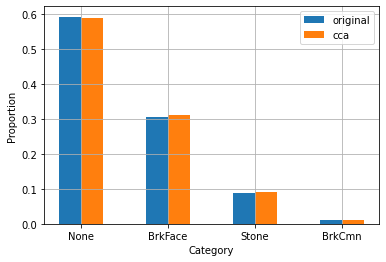

In [26]:
cat_df = categorical_distribution(df, df_cca, 'MasVnrType')
plot_categorical_distribution(cat_df)